# R5 regions

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os.path
import string

import dotenv
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import scmdata
import seaborn as sns
from matplotlib.gridspec import GridSpec

import utils

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
dotenv.load_dotenv()

True

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["text.usetex"] = False
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0
plt.rcParams["font.size"] = 16
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.framealpha"] = 0.7
plt.rcParams["legend.handleheight"] = 0.8
plt.rcParams["legend.handlelength"] = 2

<IPython.core.display.Javascript object>

In [5]:
UPTAKE_PATHWAYS_FILE = os.path.join(
    utils.DATA_DIR,
    "processed",
    "pathways",
    "co2-uptake-pathways_{}.nc".format(utils.UPTAKE_PATHWAYS_ID),
)
UPTAKE_PATHWAYS_FILE

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/pathways/co2-uptake-pathways_7d7c42.nc'

<IPython.core.display.Javascript object>

In [6]:
OUT_FILE = os.path.join(
    utils.DATA_DIR, "processed", "summary", "land-use-pathways-r5.csv"
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)

<IPython.core.display.Javascript object>

In [7]:
OUT_FILE_FIGURE = os.path.join(utils.FIGURES_DIR, "r5-removal-pathways.pdf")
os.makedirs(os.path.dirname(OUT_FILE_FIGURE), exist_ok=True)

<IPython.core.display.Javascript object>

In [8]:
landuse_pathways = scmdata.ScmRun.from_nc(UPTAKE_PATHWAYS_FILE)
landuse_pathways

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<ScmRun (timeseries: 63000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model     region             scenario      unit  \
	0                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	1                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	2                    0  One Earth     Boreal  Climate restoration  GtC / yr   
	3                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	4                    0  One Earth  Temperate  Climate restoration  GtC / yr   
	...                ...        ...        ...                  ...       ...   
	62995             2999  One Earth      World  Climate restoration  GtC / yr   
	62996             2999  One Earth      World  Climate restoration  GtC / yr   
	62997             2999  One Earth      World  Climate restoration  GtC / yr   
	62998             2999  One Earth      World  Climate restoration  GtC / yr   
	62999  

<IPython.core.display.Javascript object>

In [9]:
AREA_FRACTIONS_BY_REGION_FILE = os.path.join(
    utils.DATA_DIR,
    "interim",
    "pathway-specs",
    "areas-by-r5-region.csv".format(utils.SPECS_HANDLING_ID),
)

<IPython.core.display.Javascript object>

In [10]:
area_fractions_by_region = pd.read_csv(AREA_FRACTIONS_BY_REGION_FILE)
area_fractions_by_region

pathway     region      R5           unit  \
0                   Agroforestry  Temperate  R5ASIA  dimensionless   
1                   Agroforestry  Temperate   R5LAM  dimensionless   
2                   Agroforestry  Temperate  R5OECD  dimensionless   
3                   Agroforestry  Temperate   R5REF  dimensionless   
4                   Agroforestry    Tropics  R5ASIA  dimensionless   
5                   Agroforestry    Tropics   R5LAM  dimensionless   
6                   Agroforestry    Tropics   R5MAF  dimensionless   
7                   Agroforestry    Tropics  R5OECD  dimensionless   
8                   Agroforestry    Tropics   R5REF  dimensionless   
9   Forest Ecosystem Restoration     Boreal  R5OECD  dimensionless   
10  Forest Ecosystem Restoration     Boreal   R5REF  dimensionless   
11  Forest Ecosystem Restoration  Temperate  R5ASIA  dimensionless   
12  Forest Ecosystem Restoration  Temperate   R5LAM  dimensionless   
13  Forest Ecosystem Restoration  Temperate  R5OECD  dimensionless   
14  Forest Ecosystem Restoration  Temperate   R5REF  dimensionless   
15  Forest Ecosystem Restoration    Tropics  R5ASIA  dimensionless   
16  Forest Ecosystem Restoration    Tropics   R5LAM  dimensionless   
17  Forest Ecosystem Restoration    Tropics   R5MAF  dimensionless   
18  Forest Ecosystem Restoration    Tropics  R5OECD  dimensionless   
19  Forest Ecosystem Restoration    Tropics   R5REF  dimensionless   
20               Reduced Harvest     Boreal  R5OECD  dimensionless   
21               Reduced Harvest     Boreal   R5REF  dimensionless   
22               Reduced Harvest  Temperate  R5ASIA  dimensionless   
23               Reduced Harvest  Temperate   R5LAM  dimensionless   
24               Reduced Harvest  Temperate  R5OECD  dimensionless   
25               Reduced Harvest  Temperate   R5REF  dimensionless   
26               Reduced Harvest    Tropics  R5ASIA  dimensionless   
27               Reduced Harvest    Tropics   R5LAM  dimensionless   
28               Reduced Harvest    Tropics   R5MAF  dimensionless   
29               Reduced Harvest    Tropics  R5OECD  dimensionless   
30               Reduced Harvest    Tropics   R5REF  dimensionless   
31                 Reforestation  Temperate  R5ASIA  dimensionless   
32                 Reforestation  Temperate   R5LAM  dimensionless   
33                 Reforestation  Temperate  R5OECD  dimensionless   
34                 Reforestation  Temperate   R5REF  dimensionless   
35                 Reforestation    Tropics  R5ASIA  dimensionless   
36                 Reforestation    Tropics   R5LAM  dimensionless   
37                 Reforestation    Tropics   R5MAF  dimensionless   
38                 Reforestation    Tropics  R5OECD  dimensionless   
39                 Reforestation    Tropics   R5REF  dimensionless   
40                  Silvopasture  Temperate  R5ASIA  dimensionless   
41                  Silvopasture  Temperate   R5LAM  dimensionless   
42                  Silvopasture  Temperate  R5OECD  dimensionless   
43                  Silvopasture  Temperate   R5REF  dimensionless   
44                  Silvopasture    Tropics  R5ASIA  dimensionless   
45                  Silvopasture    Tropics   R5LAM  dimensionless   
46                  Silvopasture    Tropics   R5MAF  dimensionless   
47                  Silvopasture    Tropics  R5OECD  dimensionless   
48                  Silvopasture    Tropics   R5REF  dimensionless   

                  variable     value  
0   Fraction of total area  0.294323  
1   Fraction of total area  0.020588  
2   Fraction of total area  0.513047  
3   Fraction of total area  0.172042  
4   Fraction of total area  0.380920  
5   Fraction of total area  0.175029  
6   Fraction of total area  0.341997  
7   Fraction of total area  0.101027  
8   Fraction of total area  0.001027  
9   Fraction of total area  0.369456  
10  Fraction of total area  0.630544  
11  Fraction of total area  0.334301  
12  Fraction of t

<IPython.core.display.Javascript object>

In [11]:
landuse_pathways.get_unique_meta("region")

['Boreal', 'Temperate', 'Tropics', 'World']

<IPython.core.display.Javascript object>

In [12]:
world_total = landuse_pathways.filter(region="World", variable="Uptake|CO2")
world_total

<ScmRun (timeseries: 3000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model region             scenario      unit  \
	15                   0  One Earth  World  Climate restoration  GtC / yr   
	36                   1  One Earth  World  Climate restoration  GtC / yr   
	57                   2  One Earth  World  Climate restoration  GtC / yr   
	78                   3  One Earth  World  Climate restoration  GtC / yr   
	99                   4  One Earth  World  Climate restoration  GtC / yr   
	...                ...        ...    ...                  ...       ...   
	62910             2995  One Earth  World  Climate restoration  GtC / yr   
	62931             2996  One Earth  World  Climate restoration  GtC / yr   
	62952             2997  One Earth  World  Climate restoration  GtC / yr   
	62973             2998  One Earth  World  Climate restoration  GtC / yr   
	62994             2999  One Earth  World  Climate re

<IPython.core.display.Javascript object>

In [13]:
landuse_pathways_breakdown = landuse_pathways.filter(region="World", keep=False).filter(
    variable="Uptake|CO2", keep=False
)

r5_breakdown = []
for prrun in landuse_pathways_breakdown.groupby(["region", "variable"]):
    region = prrun.get_unique_meta("region", True)
    variable = prrun.get_unique_meta("variable", True)
    pathway = variable.split("|")[-1]

    area_fractions_by_region_pr = area_fractions_by_region[
        (area_fractions_by_region["pathway"] == pathway)
        & (area_fractions_by_region["region"] == region)
    ]
    #     display(area_fractions_by_region_pr)
    for r5, df in area_fractions_by_region_pr.groupby("R5"):
        r5_fraction = df["value"].values.squeeze()
        prrun_r5 = prrun * float(r5_fraction)
        prrun_r5["R5 region"] = r5

        r5_breakdown.append(prrun_r5)

r5_breakdown = scmdata.run_append(r5_breakdown)

print("Checking sum conserved")
pdt.assert_frame_equal(
    landuse_pathways_breakdown.timeseries().sort_index(),
    r5_breakdown.process_over("R5 region", "sum").sort_index(),
)

r5_breakdown

Checking sum conserved


<ScmRun (timeseries: 147000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       R5 region  ensemble_member      model   region             scenario  \
	0         R5OECD                0  One Earth   Boreal  Climate restoration   
	1         R5OECD                1  One Earth   Boreal  Climate restoration   
	2         R5OECD                2  One Earth   Boreal  Climate restoration   
	3         R5OECD                3  One Earth   Boreal  Climate restoration   
	4         R5OECD                4  One Earth   Boreal  Climate restoration   
	...          ...              ...        ...      ...                  ...   
	146995     R5REF             2995  One Earth  Tropics  Climate restoration   
	146996     R5REF             2996  One Earth  Tropics  Climate restoration   
	146997     R5REF             2997  One Earth  Tropics  Climate restoration   
	146998     R5REF             2998  One Earth  Tropics  Climate restoration   
	146999     R5REF 

<IPython.core.display.Javascript object>

In [14]:
r5_breakdown_sum = r5_breakdown.process_over(
    ["region", "variable"], "sum"
).reset_index()
r5_breakdown_sum["variable"] = "Uptake|CO2"
r5_breakdown_sum = r5_breakdown_sum.rename({"R5 region": "region"}, axis="columns")
r5_breakdown_sum = scmdata.ScmRun(r5_breakdown_sum)
r5_breakdown_sum

<ScmRun (timeseries: 15000, timepoints: 281)>
Time:
	Start: 2020-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	       ensemble_member      model  region             scenario      unit  \
	0                    0  One Earth  R5ASIA  Climate restoration  GtC / yr   
	1                    0  One Earth   R5LAM  Climate restoration  GtC / yr   
	2                    0  One Earth   R5MAF  Climate restoration  GtC / yr   
	3                    0  One Earth  R5OECD  Climate restoration  GtC / yr   
	4                    0  One Earth   R5REF  Climate restoration  GtC / yr   
	...                ...        ...     ...                  ...       ...   
	14995             2999  One Earth  R5ASIA  Climate restoration  GtC / yr   
	14996             2999  One Earth   R5LAM  Climate restoration  GtC / yr   
	14997             2999  One Earth   R5MAF  Climate restoration  GtC / yr   
	14998             2999  One Earth  R5OECD  Climate restoration  GtC / yr   
	14999             2999  One Earth   R5RE

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/one-earth-2022/lib/python3.7/site-packages/scmdata/run.py:170: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../figures/r5-removal-pathways.pdf'

'/data2/ubuntu-znicholls/one-earth-2022/notebooks/../data/processed/summary/land-use-pathways-r5.csv'

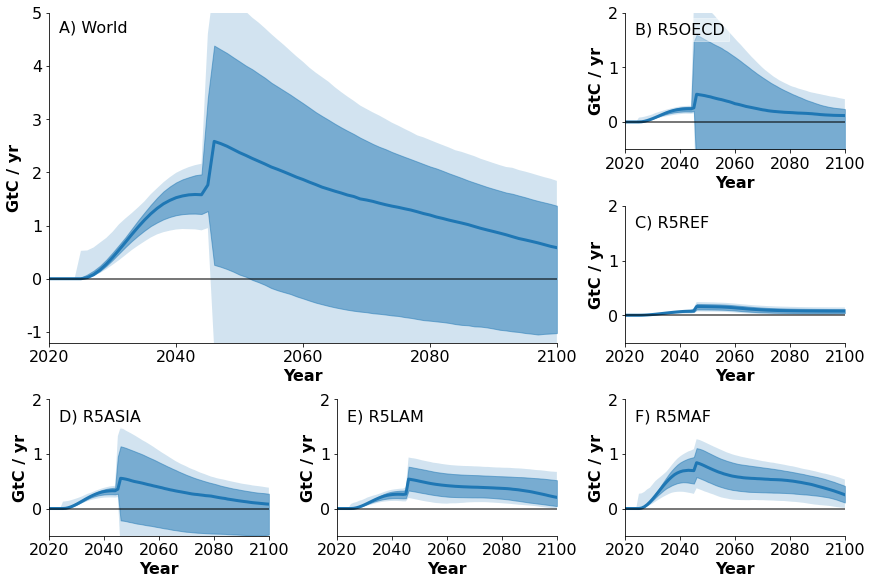

<IPython.core.display.Javascript object>

In [15]:
fig = plt.figure(constrained_layout=True)
gs = GridSpec(3, 3, figure=fig)

integrate = False
ylim = [-1.2, 5]
ylim_r5 = [-0.5, 2.0]
# integrate = True
# ylim = [-100, 200]
# ylim_r5 = [-50, 75]

regions_axes_ylim = (
    ("World", fig.add_subplot(gs[:2, :2]), ylim),
    ("R5OECD", fig.add_subplot(gs[0, 2]), ylim_r5),
    ("R5REF", fig.add_subplot(gs[1, 2]), ylim_r5),
    ("R5ASIA", fig.add_subplot(gs[2, 0]), ylim_r5),
    ("R5LAM", fig.add_subplot(gs[2, 1]), ylim_r5),
    ("R5MAF", fig.add_subplot(gs[2, 2]), ylim_r5),
)

pdf = world_total.append(r5_breakdown_sum)
if integrate:
    pdf = pdf.integrate()

pdf = scmdata.ScmRun(
    pdf.quantiles_over("ensemble_member", (0.05, 0.17, 0.5, 0.83, 0.95))
).filter(year=range(2000, 2100 + 1))

for i, (r, ax, ylim) in enumerate(regions_axes_ylim):
    pdf.filter(region=r).plumeplot(
        hue_var="region",
        hue_label="Region",
        #         quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
        #         quantiles_plumes=[((0.17, 0.83), 0.2), ((0.5,), 1.0)],
        quantiles_plumes=[((0.05, 0.95), 0.2), ((0.17, 0.83), 0.5), ((0.5,), 1.0)],
        linewidth=3,
        ax=ax,
        pre_calculated=True,
        time_axis="year",
    )
    ax.legend().remove()
    ax.set_ylim(ylim)
    ax.axhline(0, color="black", alpha=0.7)

    utils.annotate_ax(
        ax,
        f"{string.ascii_uppercase[i]}) {r}",
        (10, 115 if i > 0 else 310),
        "axes points",
    )

    ax.set_xlabel("Year")
    ax.set_xticks(range(2020, 2100 + 1, 20))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
#     ax.grid()

plt.savefig(OUT_FILE_FIGURE, transparent=True)
display(OUT_FILE_FIGURE)
pdf.to_csv(OUT_FILE)
display(OUT_FILE)

In [16]:
pdf.timeseries()

time                                                               2020-01-01  \
model     quantile region scenario            unit     variable                 
One Earth 0.05     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.17     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.50     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.83     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.95     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   

time                                                               2021-01-01  \
model     quantile region scenario            unit     variable                 
One Earth 0.05     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.17     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5REF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   World  Climate restoration GtC / yr Uptake|CO2         0.0   
          0.50     R5ASIA Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5LAM  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5MAF  Climate restoration GtC / yr Uptake|CO2         0.0   
                   R5OECD Clim

<IPython.core.display.Javascript object>

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c179f5850>,
  <matplotlib.lines.Line2D at 0x7f9c1795b390>])

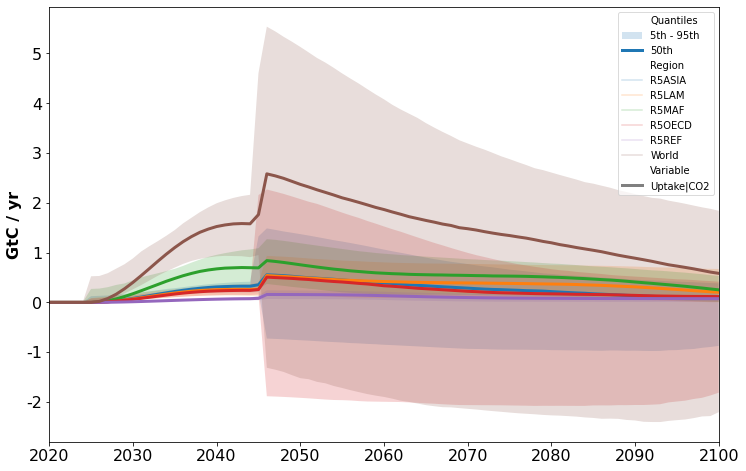

<IPython.core.display.Javascript object>

In [17]:
pdf.plumeplot(
    hue_var="region",
    hue_label="Region",
    quantiles_plumes=[((0.05, 0.95), 0.2), ((0.5,), 1.0)],
    linewidth=3,
    pre_calculated=True,
)